# Data Manipulation with pandas

👋 Welcome to your new **workspace**! Here, you can experiment with the data you used in [Data Manipulation with pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas) and practice your newly learned skills with some challenges. You can find out more about DataCamp Workspace [here](https://workspace-docs.datacamp.com/).

On average, we expect users to take approximately **30 minutes** to complete the content in this workspace. However, you are free to experiment and practice in it as long as you would like!

## 1. Get Started
Below is a code cell. It is used to execute Python code. The code below imports three packages you used in Data Manipulation with pandas: pandas, NumPy, and Matplotlib. The code also imports data you used in the course as DataFrames using the pandas [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

🏃**To execute the code, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [ ]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocado = pd.read_csv("datasets/avocado.csv")
homelessness = pd.read_csv("datasets/homelessness.csv")
temperatures = pd.read_csv("datasets/temperatures.csv")
walmart = pd.read_csv("datasets/walmart.csv")

# Print the first DataFrame
avocado

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


## 2. Write Code
After running the cell above, you have created four pandas DataFrames: `avocado`, `homelessness`, `temperatures`, and `walmart`. 

**Add code** to the code cells below to try one (or more) of the following challenges:

1. Print the highest weekly sales for each `department` in the `walmart` DataFrame. Limit your results to the top five departments, in descending order. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=1).
2. What was the total `nb_sold` of organic avocados in 2017 in the `avocado` DataFrame? If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing-dataframes?ex=6).
3. Create a bar plot of the total number of homeless people by region in the `homelessness` DataFrame. Order the bars in descending order. Bonus: create a horizontal bar chart. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).
4. Create a line plot with two lines representing the temperatures in Toronto and Rome. Make sure to properly label your plot. Bonus: add a legend for the two lines. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).

Be sure to check out the **Answer Key** at the end to see one way to solve each problem. Did you try something similar?

**Reminder: To execute the code you add to a cell, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [ ]:
walmart.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
# 1. Print the highest weekly sales for each department
walmart.pivot_table(values="weekly_sales", index="department", aggfunc=np.max).sort_values(by="weekly_sales", ascending=False).head()

,weekly_sales
department,
92,293966.05
72,232558.51
95,213042.66
90,166263.81
91,162497.78


In [ ]:
avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [56]:
# 2. What was the total `nb_sold` of organic avocados in 2017?
avocado2 = avocado.set_index(["type", "year"]).sort_index()
avocado2.loc[("organic", 2017), "nb_sold"].sum()



23321281.07

In [59]:
homelessness.head()

,region,state,individuals,family_members,state_pop,total
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0
1,Pacific,Alaska,1434.0,582.0,735139,2016.0
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0
4,Pacific,California,109008.0,20964.0,39461588,129972.0


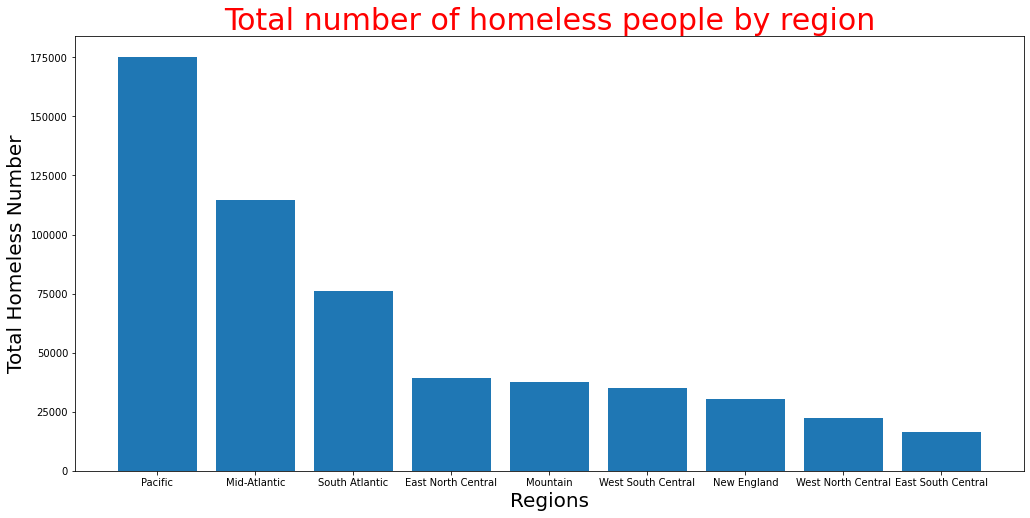

In [92]:
# 3. Create a bar plot of the number of homeless people by region
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]
homelessness2 = homelessness.groupby("region")["total"].sum()
homelessness3 = homelessness2.reset_index()
homelessness3_srtd = homelessness3.sort_values("total", ascending=False)
plt.figure(figsize=(17,8))
plt.bar("region", "total", data=homelessness3_srtd)
plt.xlabel("Regions", size=20)
plt.ylabel("Total Homeless Number", size=20)
plt.title("Total number of homeless people by region", size=30, color="red")
plt.show()

In [93]:
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


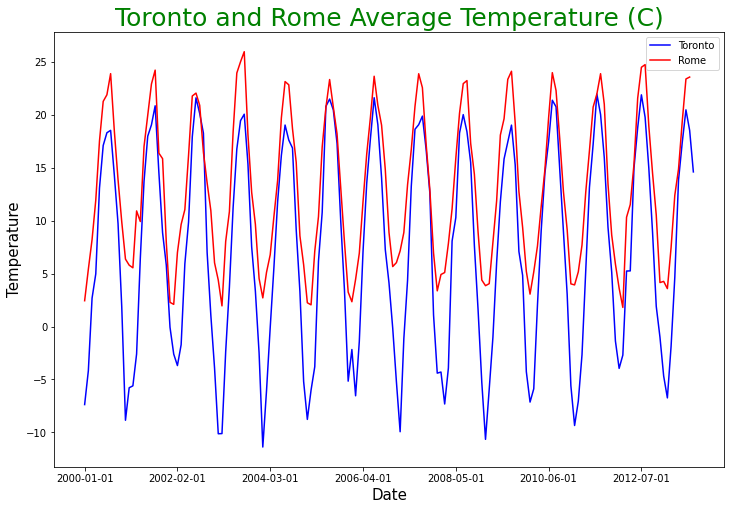

In [125]:
# 4. Create a line plot of temperatures in Toronto and Rome
toronto = temperatures[temperatures.city == "Toronto"]
rome = temperatures[temperatures.city == "Rome"]
plt.figure(figsize=(12,8))
toronto.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="blue")
rome.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="red")
plt.title("Toronto and Rome Average Temperature (C)", size=25, color="green")
plt.xlabel("Date", size=15)
plt.ylabel("Temperature", size=15)
plt.legend(labels=["Toronto", "Rome"])
plt.show()

## 3. Next Steps
Feeling confident about your skills? Continue on to [Joining Data with pandas](https://app.datacamp.com/learn/courses/joining-data-with-pandas)! This course will teach you how to combine multiple datasets, an essential skill on the road to becoming a data scientist!